#Packages used

In [ ]:
!pip install skfeature-chappers
! pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import plotly.express as px
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.cm as mcm
import operator as o
warnings.filterwarnings('ignore')


#Data Loading

In [ ]:
url='https://drive.google.com/file/d/14QSZQwFORv-NPZAQ6eEURrplqmJoZv17/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()
data.describe().columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
#Make names clearer
data.columns = ['Age', 'Sex', 'Chest pain type', 'Resting blood pressure', 'Cholesterol', 'Fasting blood sugar', 'Resting electrocardiographic', 'Max heart rate achieved',
       'Exercise induced angina', 'ST depression', 'ST slope', 'Num major vessels', 'Thalium stress test', 'Target']

#Data Statistics

In [ ]:
# list of dtypes to include
include = ['object', 'float', 'int']
  
# calling describe method
desc = data.describe(include=include)
  
# display
desc

,Age,Sex,Chest pain type,Resting blood pressure,Cholesterol,Fasting blood sugar,Resting electrocardiographic,Max heart rate achieved,Exercise induced angina,ST depression,ST slope,Num major vessels,Thalium stress test,Target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.010381,0.678201,1.020761,131.377163,247.961938,0.145329,0.515571,150.231834,0.318339,1.007612,1.418685,0.712803,2.314879,0.570934
std,9.132316,0.467977,1.027192,17.518432,51.596208,0.353043,0.514309,22.899650,0.466640,1.133491,0.613333,1.022596,0.596128,0.495801
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Cardinality

In [ ]:
print(data.nunique(dropna=True))

Age                              41
Sex                               2
Chest pain type                   4
Resting blood pressure           47
Cholesterol                     147
Fasting blood sugar               2
Resting electrocardiographic      3
Max heart rate achieved          90
Exercise induced angina           2
ST depression                    39
ST slope                          3
Num major vessels                 5
Thalium stress test               4
Target                            2
dtype: int64


##Change values of categorical values

In [ ]:
data['Sex'][data['Sex'] == 0] = 'Female'
data['Sex'][data['Sex'] == 1] = 'Male'

data['Chest pain type'][data['Chest pain type'] == 0] = 'Typical angina'
data['Chest pain type'][data['Chest pain type'] == 1] = 'Atypical angina'
data['Chest pain type'][data['Chest pain type'] == 2] = 'Non-anginal pain'
data['Chest pain type'][data['Chest pain type'] == 3] = 'Asymptomatic'

data['Fasting blood sugar'][data['Fasting blood sugar'] == 0] = 'Lower than 120mg/ml'
data['Fasting blood sugar'][data['Fasting blood sugar'] == 1] = 'Greater than 120mg/ml'

data['Resting electrocardiographic'][data['Resting electrocardiographic'] == 0] = 'Normal'
data['Resting electrocardiographic'][data['Resting electrocardiographic'] == 1] = 'ST-T wave abnormality'
data['Resting electrocardiographic'][data['Resting electrocardiographic'] == 2] = 'Left ventricular hypertrophy'

data['Exercise induced angina'][data['Exercise induced angina'] == 0] = 'No'
data['Exercise induced angina'][data['Exercise induced angina'] == 1] = 'Yes'

data['ST slope'][data['ST slope'] == 1] = 'upsloping'
data['ST slope'][data['ST slope'] == 2] = 'flat'
data['ST slope'][data['ST slope'] == 3] = 'downsloping'

data['Thalium stress test'][data['Thalium stress test'] == 1] = 'Normal'
data['Thalium stress test'][data['Thalium stress test'] == 2] = 'Fixed defect'
data['Thalium stress test'][data['Thalium stress test'] == 3] = 'Reversable defect'

data.dtypes

Age                               int64
Sex                              object
Chest pain type                  object
Resting blood pressure            int64
Cholesterol                       int64
Fasting blood sugar              object
Resting electrocardiographic     object
Max heart rate achieved           int64
Exercise induced angina          object
ST depression                   float64
ST slope                         object
Num major vessels                 int64
Thalium stress test              object
Target                            int64
dtype: object

In [ ]:
data['Sex'] = data['Sex'].astype('object')
data['Chest pain type'] = data['Chest pain type'].astype('object')
data['Fasting blood sugar'] = data['Fasting blood sugar'].astype('object')
data['Resting electrocardiographic'] = data['Resting electrocardiographic'].astype('object')
data['Exercise induced angina'] = data['Exercise induced angina'].astype('object')
data['ST slope'] = data['ST slope'].astype('object')
data['Thalium stress test'] = data['Thalium stress test'].astype('object')

data = pd.get_dummies(data, drop_first=True)

data.head()

,Age,Resting blood pressure,Cholesterol,Max heart rate achieved,ST depression,Num major vessels,Target,Sex_Male,Chest pain type_Atypical angina,Chest pain type_Non-anginal pain,Chest pain type_Typical angina,Fasting blood sugar_Lower than 120mg/ml,Resting electrocardiographic_Normal,Resting electrocardiographic_ST-T wave abnormality,Exercise induced angina_Yes,ST slope_flat,ST slope_upsloping,Thalium stress test_Fixed defect,Thalium stress test_Normal,Thalium stress test_Reversable defect
0,60,145,233,150,2.3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
1,35,130,250,187,3.5,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0
3,55,120,236,178,0.8,0,1,1,1,0,0,1,0,1,0,1,0,1,0,0
4,56,120,354,163,0.6,0,1,0,0,0,1,1,0,1,1,1,0,1,0,0


In [ ]:
#Categorical and Numeric features Data
data_num = data[['Age','Resting blood pressure','Cholesterol','Max heart rate achieved','ST depression']]
data_cat =data[['Sex_Male','Chest pain type_Atypical angina', 'Chest pain type_Non-anginal pain','Chest pain type_Typical angina' ,'Fasting blood sugar_Lower than 120mg/ml','Resting electrocardiographic_Normal', 'Resting electrocardiographic_ST-T wave abnormality','Exercise induced angina_Yes','ST slope_flat','ST slope_upsloping' ,'Num major vessels','Thalium stress test_Fixed defect','Thalium stress test_Normal','Thalium stress test_Reversable defect' ]]

#Features' names
features_num=['Age','Resting blood pressure','Cholesterol','Max heart rate achieved','ST depression']
features_cat=['Sex_Male','Chest pain type_Atypical angina', 'Chest pain type_Non-anginal pain','Chest pain type_Typical angina' ,'Fasting blood sugar_Lower than 120mg/ml','Resting electrocardiographic_Normal', 'Resting electrocardiographic_ST-T wave abnormality','Exercise induced angina_Yes','ST slope_flat','ST slope_upsloping' ,'Num major vessels','Thalium stress test_Fixed defect','Thalium stress test_Normal','Thalium stress test_Reversable defect']

# **Data Visualization**
#**-----------------------**
##Features histogram
More detailed than box plots

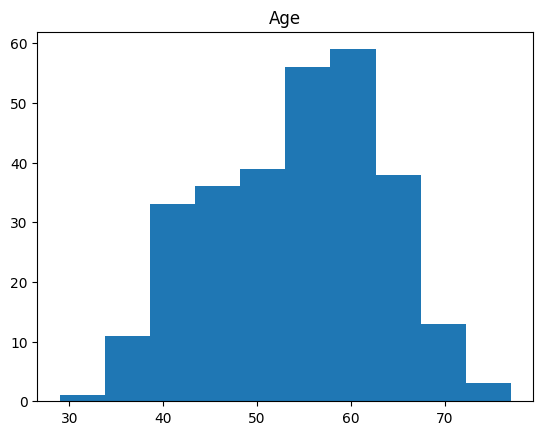

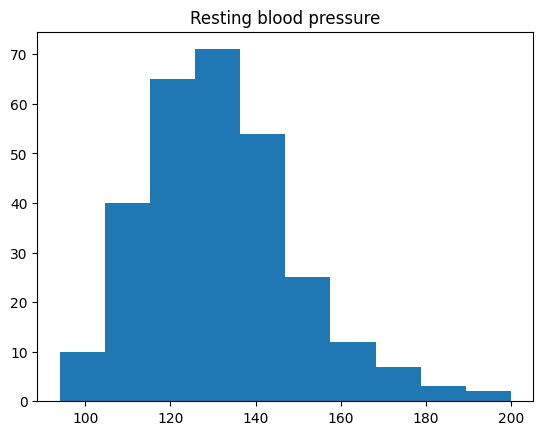

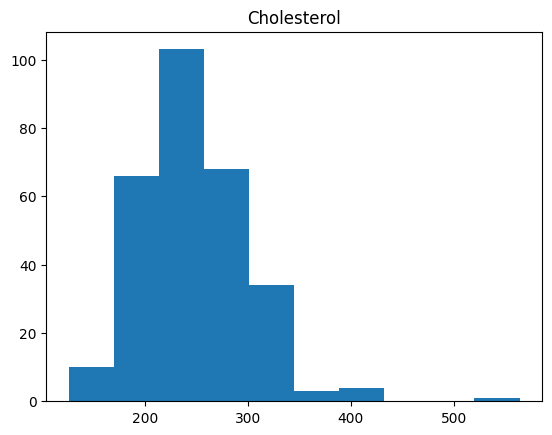

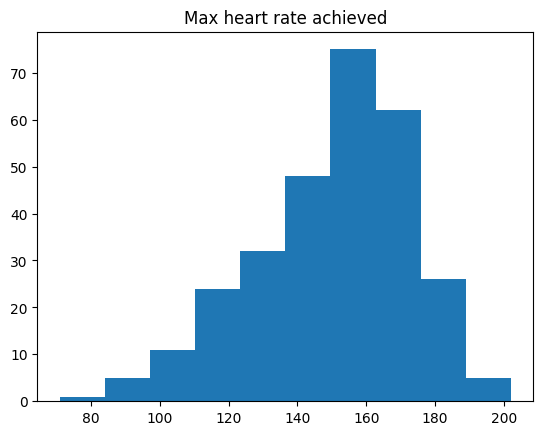

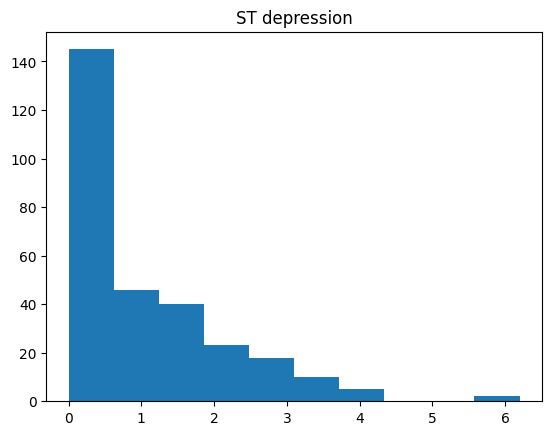

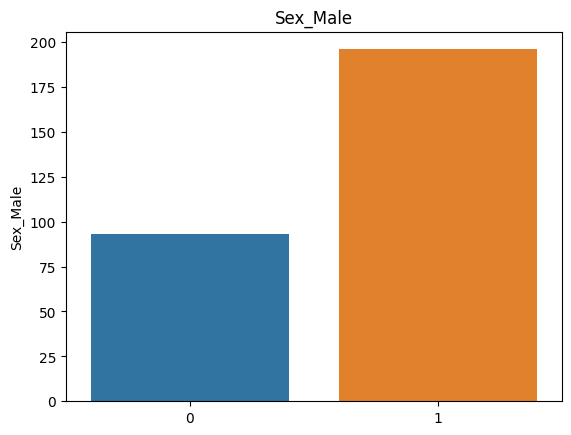

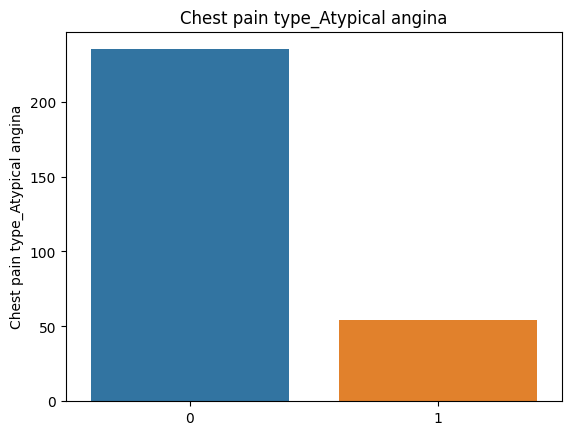

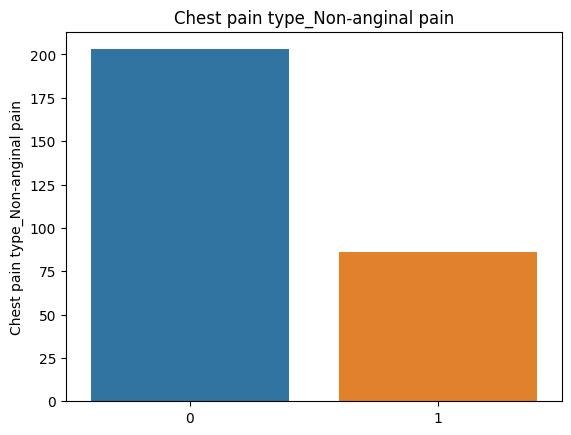

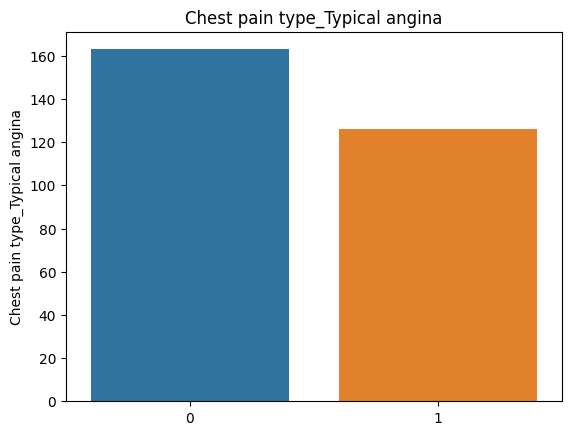

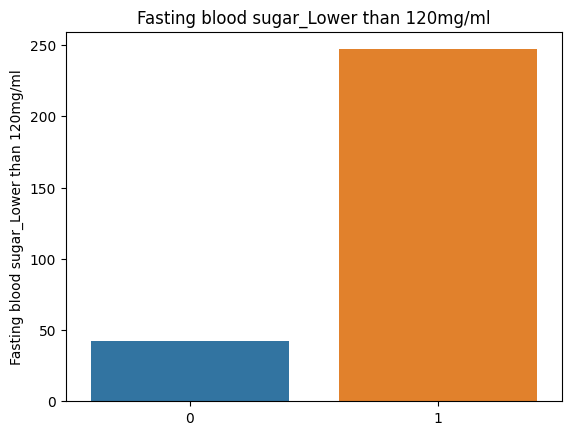

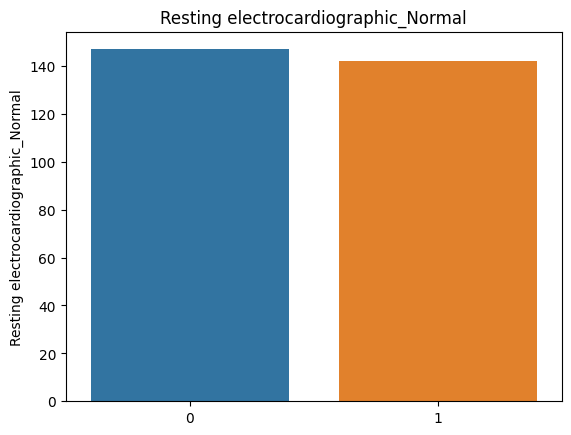

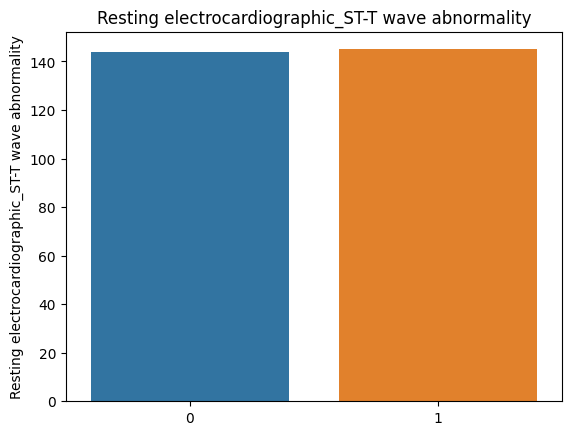

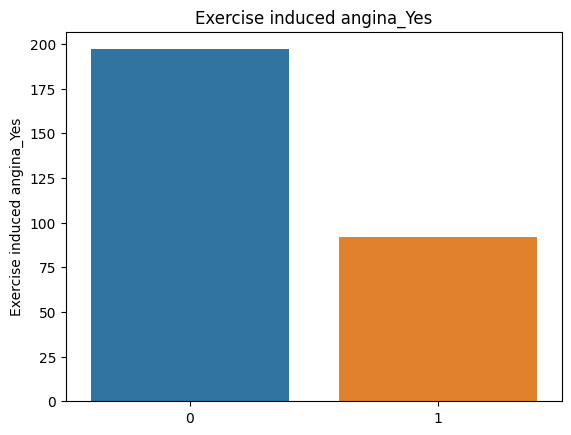

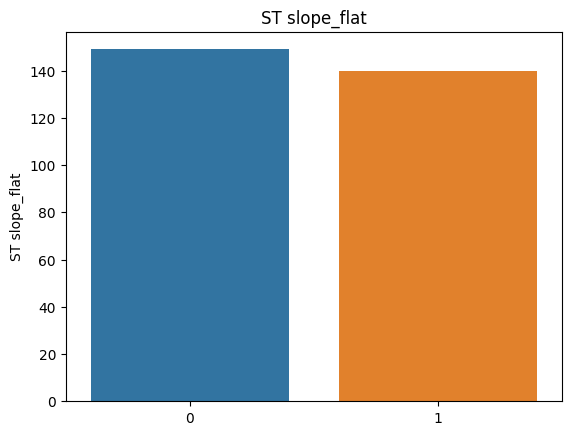

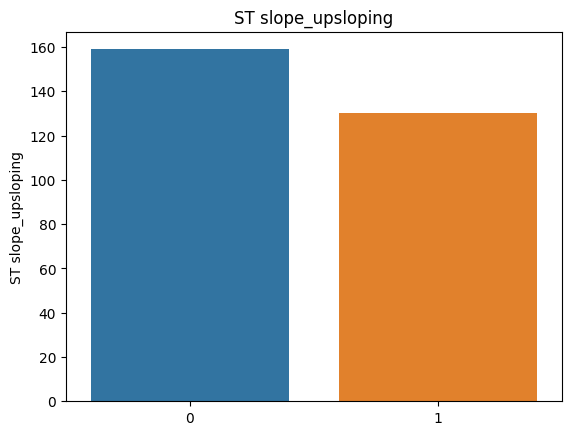

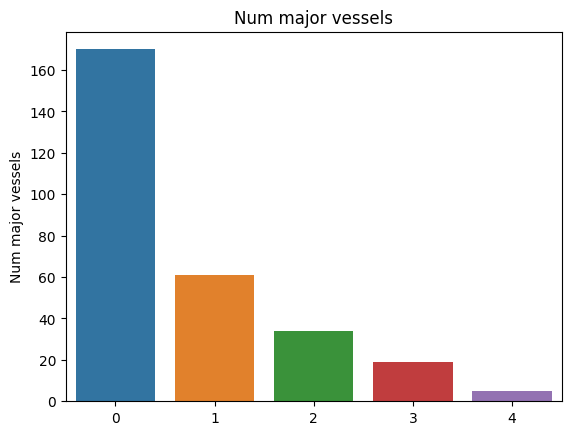

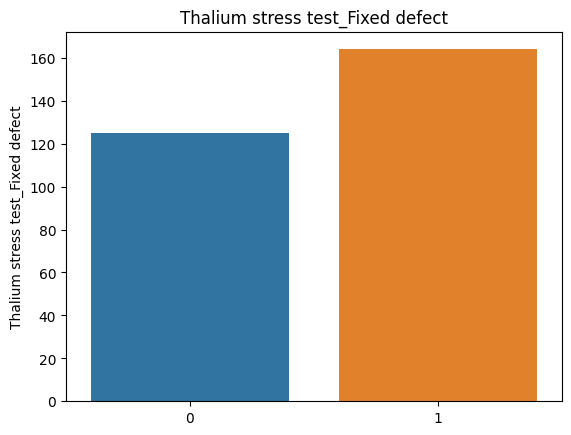

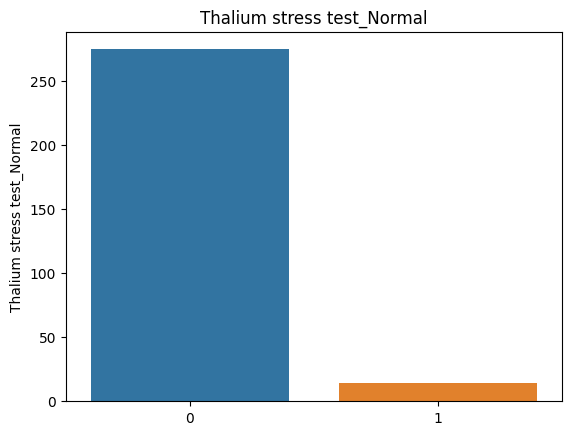

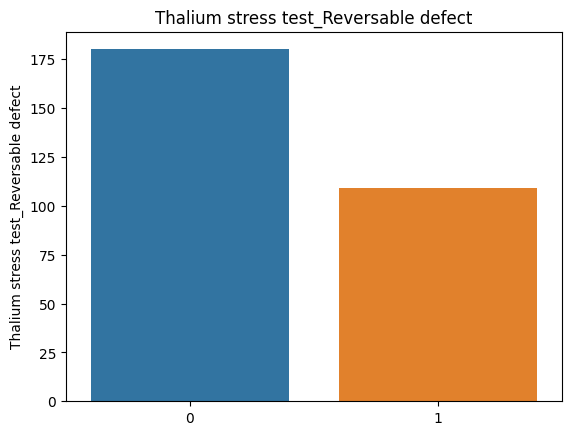

In [ ]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

for i in data_cat.columns:
  sns.barplot(x=data_cat[i].value_counts().index,y=data_cat[i].value_counts()).set_title(i)
  plt.show()


##Box Plots
To easier see the differences in central tendency and variation between levels

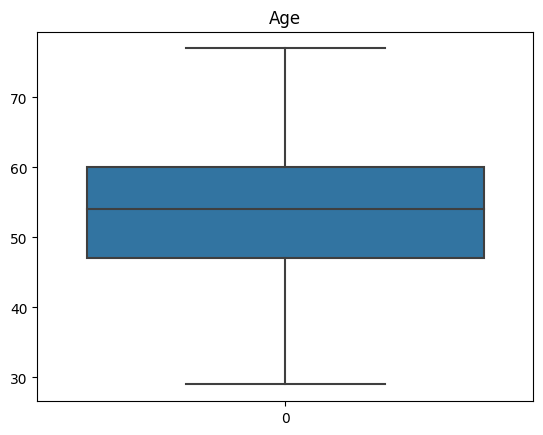

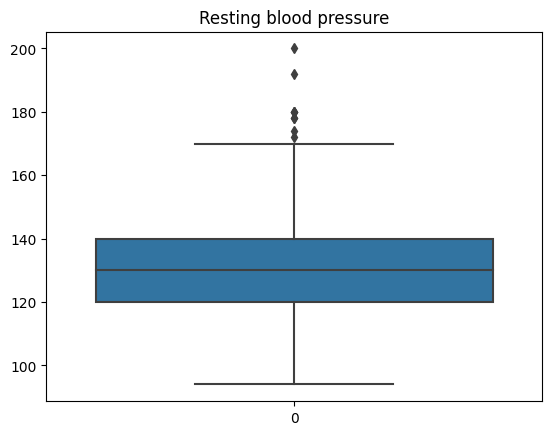

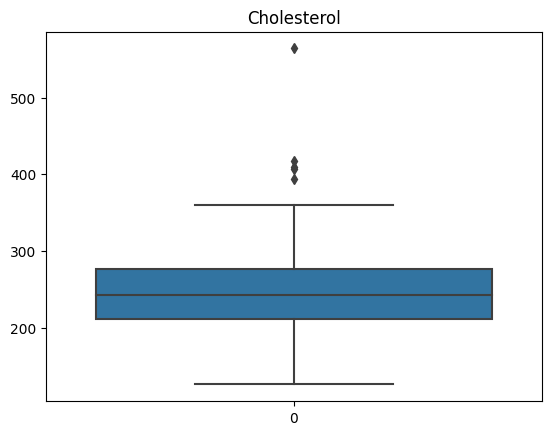

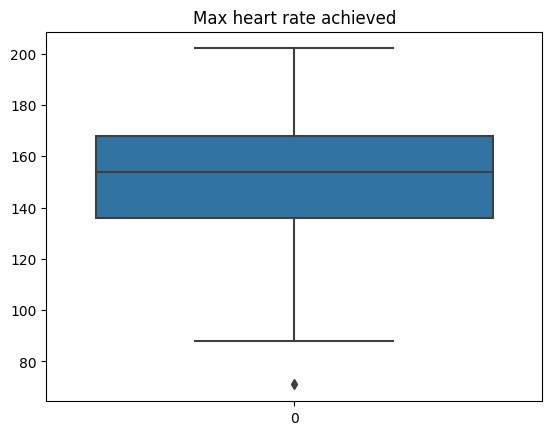

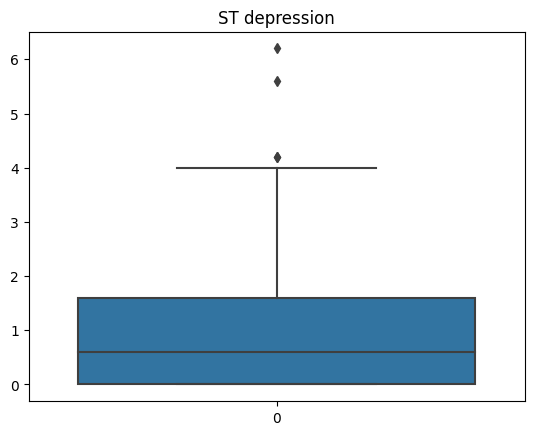

In [ ]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

##Delete missing values

In [ ]:
data.dropna()
#Update data_num & data_cat variables also
for column in features_num:
  data_num[column]=data[column]
for column in features_cat:
  data_cat[column]=data[column]

##Outliers

In [ ]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [ ]:
#looping on numeric features to delete outliers
for column in features_num:
  low_feature,up_feature = outlinefree(data[column])
  data[column].replace(list(data[data[column] > up_feature][column]) ,up_feature,inplace=True)
  data[column].replace(list(data[data[column] < low_feature][column]) ,low_feature,inplace=True)
  data_num[column]=data[column]

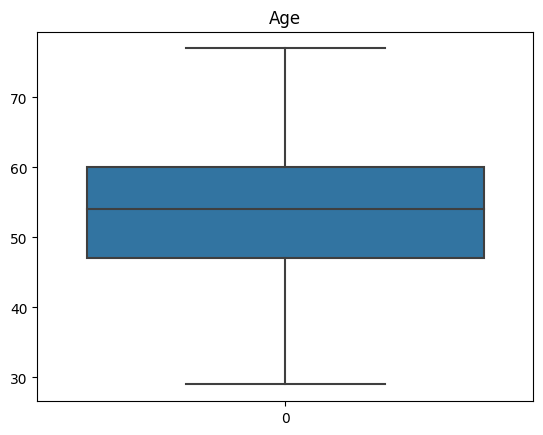

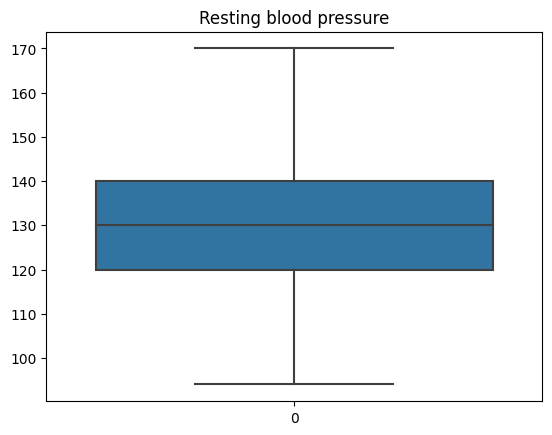

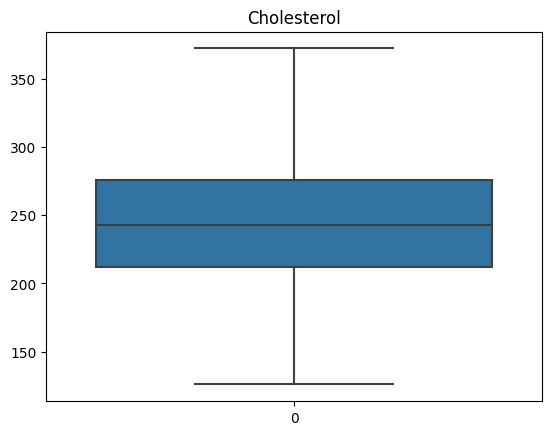

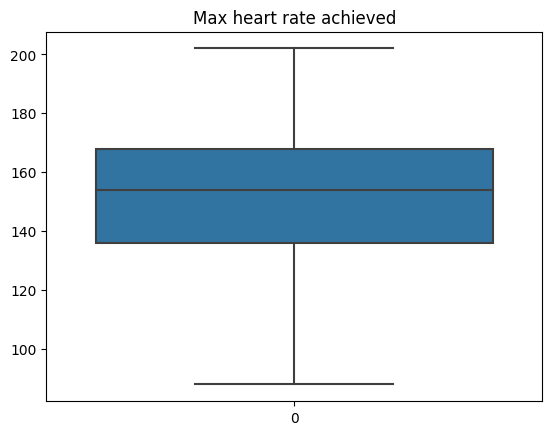

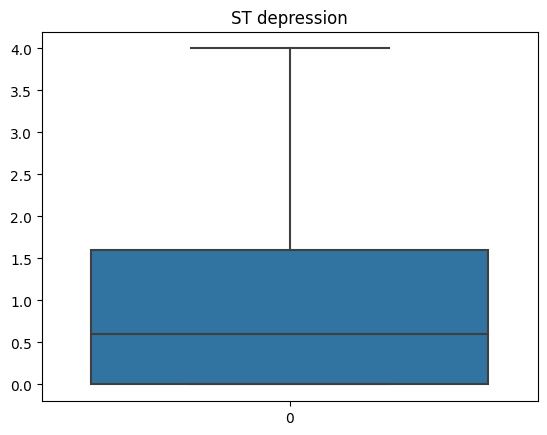

In [ ]:
#Box plots after replace the outliers
for j in data_num.columns:
    sns.boxplot(data_num[j])
    plt.title(j)
    plt.show()

##SPLOM -between the cont features-

In [ ]:
fig = px.scatter_matrix(data,
    dimensions=features_num,
    color="Target",
    title="Scatter matrix of heart disease predection data set",
    labels={col:col.replace('_', ' ') for col 
            in data.columns}, height= 850,width=1200) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()

#Feature Selection - Part of data preprocessing
##Filter methods

How Many features We have before selection?

In [ ]:
print('WE HAVE: '+ str(data.shape[1]-1) + ' FEATURES')

WE HAVE: 19 FEATURES


##Variance Threshold
Finding the non-categorical features with no variance
It removes all features whose variance doesn’t meet some threshold
but all of them match 

In [ ]:
v_threshold=VarianceThreshold(threshold=0)
v_threshold.fit(data_num)     #fit finds those features
v= v_threshold.get_support()     #True means the variable does not have zero variance
print(v)
print("\nFeatures Doesn't have zero variance")
for i in range(len(v)):
  if v[i]==True:
    print(i+1,data_num.columns[i])

[ True  True  True  True  True]

Features Doesn't have zero variance
1 Age
2 Resting blood pressure
3 Cholesterol
4 Max heart rate achieved
5 ST depression


##Correlation HeatMap
Checking relationships between features

                                                         Age  \
Age                                                 1.000000   
Resting blood pressure                              0.273322   
Cholesterol                                         0.230283   
Max heart rate achieved                            -0.396621   
ST depression                                       0.203448   
Num major vessels                                   0.272858   
Sex_Male                                           -0.122710   
Chest pain type_Atypical angina                    -0.118368   
Chest pain type_Non-anginal pain                   -0.054703   
Chest pain type_Typical angina                      0.118402   
Fasting blood sugar_Lower than 120mg/ml            -0.106149   
Resting electrocardiographic_Normal                 0.144652   
Resting electrocardiographic_ST-T wave abnormality -0.162075   
Exercise induced angina_Yes                         0.100256   
ST slope_flat                           

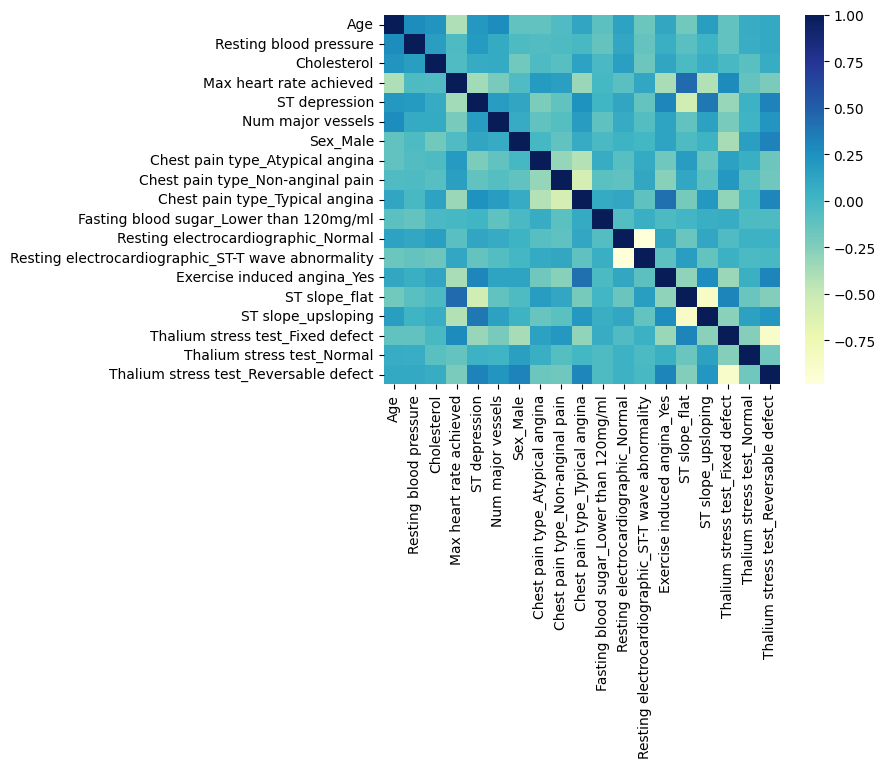

In [ ]:
# prints data that will be plotted
# columns shown here are selected by corr() since they are ideal for the plot
print(data[data.columns[0: len(data.columns)].drop('Target')].corr())

# plotting correlation heatmap
dataplot = sns.heatmap(data[data.columns[0: len(data.columns)].drop('Target')].corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()

##Correlation with output variable

In [ ]:
data_num['Target']=data['Target']
cor = data_num.corr()
#Correlation with output variable
print('Correlations with output variable')
cor_target = abs(cor["Target"])
print(cor_target)

Correlations with output variable
Age                        0.202999
Resting blood pressure     0.128482
Cholesterol                0.150636
Max heart rate achieved    0.415895
ST depression              0.439097
Target                     1.000000
Name: Target, dtype: float64


Makes sense to delete Resting blood pressure feature

In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
print('\n Selected features')
print(relevant_features)


 Selected features
Age                        0.202999
Cholesterol                0.150636
Max heart rate achieved    0.415895
ST depression              0.439097
Target                     1.000000
Name: Target, dtype: float64


In [ ]:
del data['Resting blood pressure']
del data_num['Resting blood pressure']
features_num.remove('Resting blood pressure')

##Fisher's score
Makes sense to delete Age feature

<Axes: >

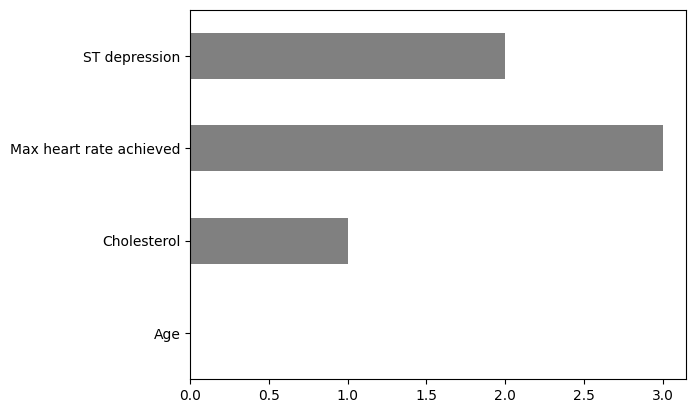

In [ ]:
X = data_num.drop(columns='Target').values
Y = data['Target'].values
scores=fisher_score.fisher_score(X,Y) #calculate scores
importances = pd.Series(scores, data.columns[0: len(data_num.columns)-1])
importances.plot(kind='barh', color='grey')

In [ ]:
del data['Age']
del data_num['Age']
features_num.remove('Age')

## Num Features After Selection

In [ ]:
# print('WE HAVE: '+ str(data.shape[1]-1) + ' FEATURES')

del data_num['Target']
print('WE HAVE: '+ str(data_num.shape[1]) + ' Numeric FEATURES')
print('\nThe Features\n--------------------')
for i in features_num:
  print(i)

print('\nAnd WE HAVE: '+ str(data_cat.shape[1]) + ' Categorical FEATURES')
data.head()

WE HAVE: 3 Numeric FEATURES

The Features
--------------------
Cholesterol
Max heart rate achieved
ST depression

And WE HAVE: 14 Categorical FEATURES


,Cholesterol,Max heart rate achieved,ST depression,Num major vessels,Target,Sex_Male,Chest pain type_Atypical angina,Chest pain type_Non-anginal pain,Chest pain type_Typical angina,Fasting blood sugar_Lower than 120mg/ml,Resting electrocardiographic_Normal,Resting electrocardiographic_ST-T wave abnormality,Exercise induced angina_Yes,ST slope_flat,ST slope_upsloping,Thalium stress test_Fixed defect,Thalium stress test_Normal,Thalium stress test_Reversable defect
0,233,150,2.3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
1,250,187,3.5,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0
2,204,172,1.4,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0
3,236,178,0.8,0,1,1,1,0,0,1,0,1,0,1,0,1,0,0
4,354,163,0.6,0,1,0,0,0,1,1,0,1,1,1,0,1,0,0


#Categorical feature selection

In [ ]:
print('\nAllCategorical Features\n')
print(features_cat)
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
data_target=data['Target']
selected_cat_features=forward_selection(data_cat,data_target)
print('\nSelected Categorical Features\n')
print(selected_cat_features)


AllCategorical Features

['Sex_Male', 'Chest pain type_Atypical angina', 'Chest pain type_Non-anginal pain', 'Chest pain type_Typical angina', 'Fasting blood sugar_Lower than 120mg/ml', 'Resting electrocardiographic_Normal', 'Resting electrocardiographic_ST-T wave abnormality', 'Exercise induced angina_Yes', 'ST slope_flat', 'ST slope_upsloping', 'Num major vessels', 'Thalium stress test_Fixed defect', 'Thalium stress test_Normal', 'Thalium stress test_Reversable defect']

Selected Categorical Features

['Thalium stress test_Fixed defect', 'Chest pain type_Typical angina', 'Num major vessels', 'Exercise induced angina_Yes', 'ST slope_flat', 'Sex_Male', 'Resting electrocardiographic_ST-T wave abnormality']


In [ ]:
del data['Chest pain type_Atypical angina']
del data['Chest pain type_Non-anginal pain']
del data['Fasting blood sugar_Lower than 120mg/ml']
del data['Resting electrocardiographic_Normal']
del data['ST slope_upsloping']
del data['Thalium stress test_Normal']
del data[ 'Thalium stress test_Reversable defect']

del data_cat['Chest pain type_Atypical angina']
del data_cat['Chest pain type_Non-anginal pain']
del data_cat['Fasting blood sugar_Lower than 120mg/ml']
del data_cat['Resting electrocardiographic_Normal']
del data_cat['ST slope_upsloping']
del data_cat['Thalium stress test_Normal']
del data_cat[ 'Thalium stress test_Reversable defect']

features_cat.remove('Chest pain type_Atypical angina')
features_cat.remove('Chest pain type_Non-anginal pain')
features_cat.remove('Fasting blood sugar_Lower than 120mg/ml')
features_cat.remove('Resting electrocardiographic_Normal')
features_cat.remove('ST slope_upsloping')
features_cat.remove('Thalium stress test_Normal')
features_cat.remove('Thalium stress test_Reversable defect')

In [ ]:
data.head()

,Cholesterol,Max heart rate achieved,ST depression,Num major vessels,Target,Sex_Male,Chest pain type_Typical angina,Resting electrocardiographic_ST-T wave abnormality,Exercise induced angina_Yes,ST slope_flat,Thalium stress test_Fixed defect
0,233,150,2.3,0,1,1,0,0,0,0,0
1,250,187,3.5,0,1,1,0,1,0,0,1
2,204,172,1.4,0,1,0,0,0,0,1,1
3,236,178,0.8,0,1,1,0,1,0,1,1
4,354,163,0.6,0,1,0,1,1,1,1,1


##Saparating Features and Target to prepare the input variables for models

In [ ]:
del data['Target']
print(data,data_target)
features = data.values
label = data_target.values

     Cholesterol  Max heart rate achieved  ST depression  Num major vessels  \
0            233                      150            2.3                  0   
1            250                      187            3.5                  0   
2            204                      172            1.4                  0   
3            236                      178            0.8                  0   
4            354                      163            0.6                  0   
..           ...                      ...            ...                ...   
284          207                      138            1.9                  1   
285          311                      120            1.8                  2   
286          204                      162            0.8                  2   
287          232                      164            0.0                  1   
288          335                      143            3.0                  1   

     Sex_Male  Chest pain type_Typical angina  \
0 

#Techniques


## Models:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size= 0.2 ,random_state=42)
num_splits = 5

models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bias', GaussianNB()),
    ('XGBoost',xgb.XGBRFClassifier()),
]

# Logistic Regression


In [ ]:
Logistic_Model=models[0][1]
Logistic_Model.fit(X_train, y_train)
y_pred = Logistic_Model.predict(X_test)
kfold = KFold(num_splits, shuffle= True, random_state = 42)

##Confusion matrix

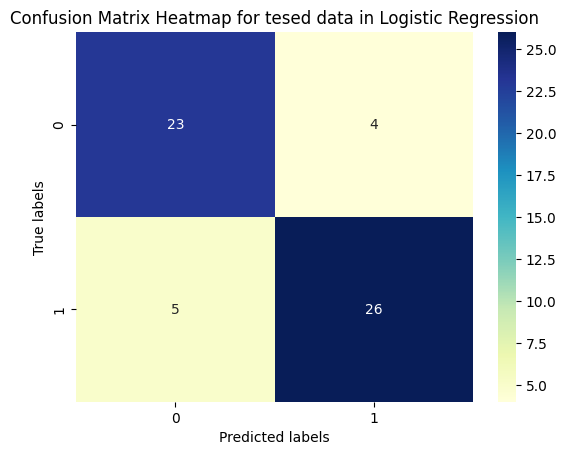

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
# Set labels for the axes
plt.title("Confusion Matrix Heatmap for tesed data in Logistic Regression")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

*Calculations of evaluation critira from confution matrix*

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 

# Compute evaluation metrics
scores = cross_val_score(Logistic_Model, features,label , cv=kfold)
precision_scores_crossval = cross_val_score(Logistic_Model, features, label, cv=kfold, scoring='precision')
f1_scores_crossval = cross_val_score(Logistic_Model, features, label, cv=kfold,  scoring='f1')


tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
# Compute ROC curve and area under the curve (AUC)
probas = Logistic_Model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
trainscore =  Logistic_Model.score(X_train,y_train)

##ROC curve

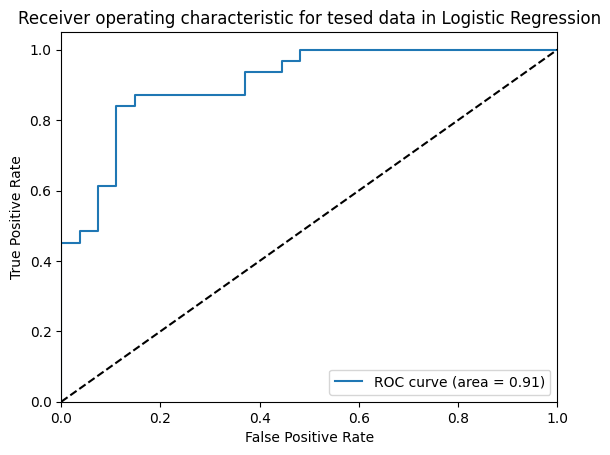

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for tesed data in Logistic Regression')
plt.legend(loc="lower right")
plt.show()

##Display the evaluation values

In [ ]:
#calculate the AUC
Yprobas = Logistic_Model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, Yprobas)
# Print evaluation metrics
print("Logistic Resression\n")
print("Confusion Matrix for tesed data:\n", cm)
print("Recall for tesed data:", recall)
print("Specificity for tesed data", specificity)
print("Precision for tesed data", precision)
print("Precision for tested data with cross validation:",precision_scores_crossval.mean())
print("NPV for tesed data:", npv)
print("Accuracy for tesed data:", accuracy)
print("Accuracy with cross validation:" ,scores.mean())
print("F1 Score for tesed data:", f1_score)
print("F1 Score for tested data with cross validation:",f1_scores_crossval.mean())
print("AUC for tesed data:", auc)
print("Accuracy for Trianed data:",trainscore)

Logistic Resression

Confusion Matrix for tesed data:
 [[23  4]
 [ 5 26]]
Recall for tesed data: 0.8387096774193549
Specificity for tesed data 0.8518518518518519
Precision for tesed data 0.8666666666666667
Precision for tested data with cross validation: 0.856780677183154
NPV for tesed data: 0.8214285714285714
Accuracy for tesed data: 0.8448275862068966
Accuracy with cross validation: 0.8546884452510586
F1 Score for tesed data: 0.8524590163934426
F1 Score for tested data with cross validation: 0.8758756213385629
AUC for tesed data: 0.905615292712067
Accuracy for Trianed data: 0.8701298701298701


*Variables to Visualize Evaluations*

In [ ]:
Accuracy_1= accuracy
Specificity_1=specificity
Precision_1=precision
Recall_1=recall
F1_score_1=f1_score
Auc_1=auc

Accuracy_scores_crossval_1=scores.mean()
Precision_scores_crossval_1=precision_scores_crossval.mean()
F1_scores_crossval_1=f1_scores_crossval.mean()

#KNN Model

In [ ]:
KNN_Model=models[2][1]
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)
kfold = KFold(num_splits, shuffle= True, random_state = 42)

##Confusion matrix


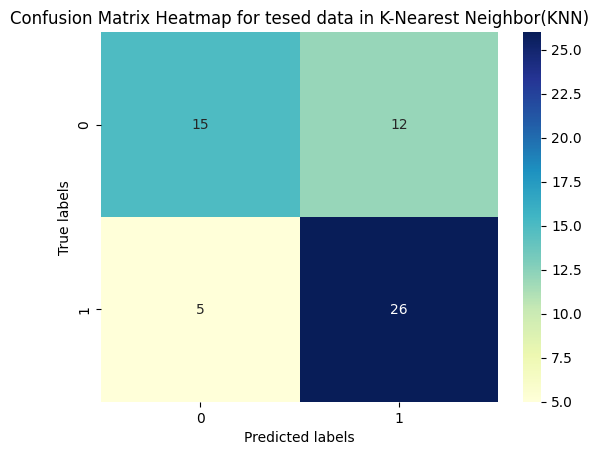

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
# Set labels for the axes
plt.title("Confusion Matrix Heatmap for tesed data in K-Nearest Neighbor(KNN)")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

*Calculation of evaluation critira from confution matrix*

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 
# Compute evaluation metrics
scores = cross_val_score(KNN_Model, features,label , cv=kfold)
precision_scores_crossval = cross_val_score(KNN_Model, features, label, cv=kfold, scoring='precision')
f1_scores_crossval = cross_val_score(KNN_Model, features, label, cv=kfold,  scoring='f1')

tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
# Compute ROC curve and area under the curve (AUC)
probas = KNN_Model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
trainscore =  KNN_Model.score(X_train,y_train)

##ROC Curve

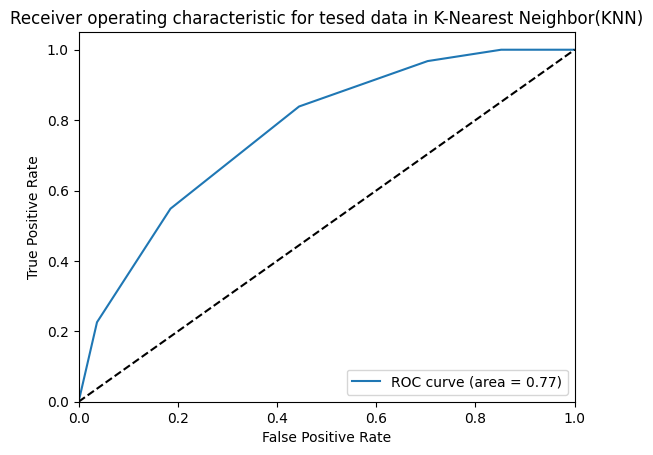

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for tesed data in K-Nearest Neighbor(KNN)')
plt.legend(loc="lower right")
plt.show()

##Display the evaluation values

In [ ]:
# Print evaluation metrics
Yprobas = KNN_Model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, Yprobas)
print("K-Nearest Neighbor\n")
print("Confusion Matrix for tesed data:\n", cm)
print("Recall for tesed data:", recall)
print("Specificity for tesed data:", specificity)
print("Precision for tesed data:", precision)
print("Precision for tested data with cross validation:",precision_scores_crossval.mean())
print("NPV for tesed data:", npv)
print("Accuracy for tesed data:", accuracy)
print("Accuracy with cross validation:" ,scores.mean())
print("F1 Score for tesed data:", f1_score)
print("F1 Score for tested data with cross validation:",f1_scores_crossval.mean())
print("AUC for tesed data:", auc)
print("Accuracy for Trianed data:",trainscore)

K-Nearest Neighbor

Confusion Matrix for tesed data:
 [[15 12]
 [ 5 26]]
Recall for tesed data: 0.8387096774193549
Specificity for tesed data: 0.5555555555555556
Precision for tesed data: 0.6842105263157895
Precision for tested data with cross validation: 0.7227997512208038
NPV for tesed data: 0.75
Accuracy for tesed data: 0.7068965517241379
Accuracy with cross validation: 0.6885662431941924
F1 Score for tesed data: 0.7536231884057972
F1 Score for tested data with cross validation: 0.7313414402334458
AUC for tesed data: 0.7694145758661888
Accuracy for Trianed data: 0.7229437229437229


*Variables to Visualize Evaluations*

In [ ]:
Accuracy_2= accuracy
Specificity_2=specificity
Precision_2=precision
Recall_2=recall
F1_score_2=f1_score
Auc_2=auc

Accuracy_scores_crossval_2=scores.mean()
Precision_scores_crossval_2=precision_scores_crossval.mean()
F1_scores_crossval_2=f1_scores_crossval.mean()



```
# This is formatted as code
```

#Naive Bayes Model

In [ ]:
Naive_Bias_Model=models[3][1]
Naive_Bias_Model.fit(X_train, y_train)
y_pred = Naive_Bias_Model.predict(X_test)
kfold = KFold(num_splits, shuffle= True, random_state = 42)


##Confusion Matrix

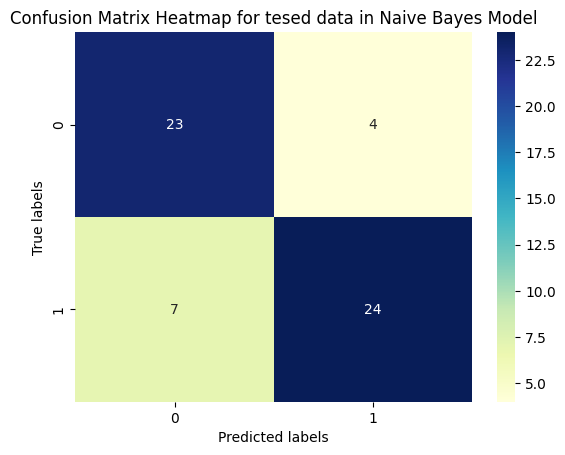

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
# Set labels for the axes
plt.title("Confusion Matrix Heatmap for tesed data in Naive Bayes Model")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

*Calculation of evaluation critira from confution matrix*

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 
# Compute evaluation metrics
scores = cross_val_score(Naive_Bias_Model, features,label , cv=kfold)
precision_scores_crossval = cross_val_score(Naive_Bias_Model, features, label, cv=kfold, scoring='precision')
f1_scores_crossval = cross_val_score(Naive_Bias_Model, features, label, cv=kfold,  scoring='f1')

tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
# Compute ROC curve and area under the curve (AUC)
probas = Naive_Bias_Model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
#accuracy of trianed data 
trainscore =  Naive_Bias_Model.score(X_train,y_train)

##ROC Curve

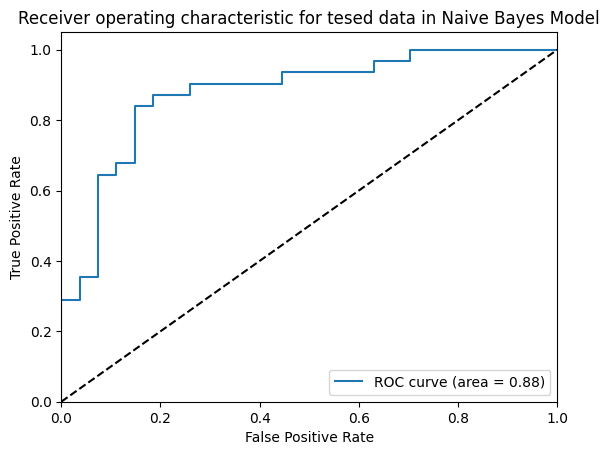

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for tesed data in Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

##Display the evaluation values

In [ ]:
# Print evaluation metrics
Yprobas = Naive_Bias_Model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, Yprobas)
print("Confusion Matrix for tesed data in naive bayes:\n", cm)
print("Recall for tesed data in naive bayes:", recall)
print("Specificity for tesed data in naive bayes:", specificity)
print("Precision for tesed data in naive bayes:", precision)
print("Precision for tested data with cross validation in naive bias:",precision_scores_crossval.mean())
print("NPV for tesed data in naive bayes:", npv)
print("Accuracy for tesed data in naive bayes:", accuracy)
print("Accuracy with cross validation:" ,scores.mean())
print("F1 Score for tesed data in naive bayes:", f1_score)
print("F1 Score for tested data with cross validation in naive bias:",f1_scores_crossval.mean())
print("AUC for tesed data in naive bayes:", auc)
print("Accuracy for Trianed data in naive bayes :",trainscore)

Confusion Matrix for tesed data in naive bayes:
 [[23  4]
 [ 7 24]]
Recall for tesed data in naive bayes: 0.7741935483870968
Specificity for tesed data in naive bayes: 0.8518518518518519
Precision for tesed data in naive bayes: 0.8571428571428571
Precision for tested data with cross validation in naive bias: 0.8480952380952381
NPV for tesed data in naive bayes: 0.7666666666666667
Accuracy for tesed data in naive bayes: 0.8103448275862069
Accuracy with cross validation: 0.8303085299455535
F1 Score for tesed data in naive bayes: 0.8135593220338982
F1 Score for tested data with cross validation in naive bias: 0.8519547783036103
AUC for tesed data in naive bayes: 0.8769414575866189
Accuracy for Trianed data in naive bayes : 0.8571428571428571


*Variables to Visualize Evaluations*

In [ ]:
Accuracy_3= accuracy
Specificity_3=specificity
Precision_3=precision
Recall_3=recall
F1_score_3=f1_score
Auc_3=auc

Accuracy_scores_crossval_3=scores.mean()
Precision_scores_crossval_3=precision_scores_crossval.mean()
F1_scores_crossval_3=f1_scores_crossval.mean()

#SVM Model

In [ ]:
SVM_Model=models[1][1]
SVM_Model.fit(X_train, y_train)
y_pred = SVM_Model.predict(X_test)
kfold = KFold(num_splits, shuffle= True, random_state = 42)


##Confusion matrix

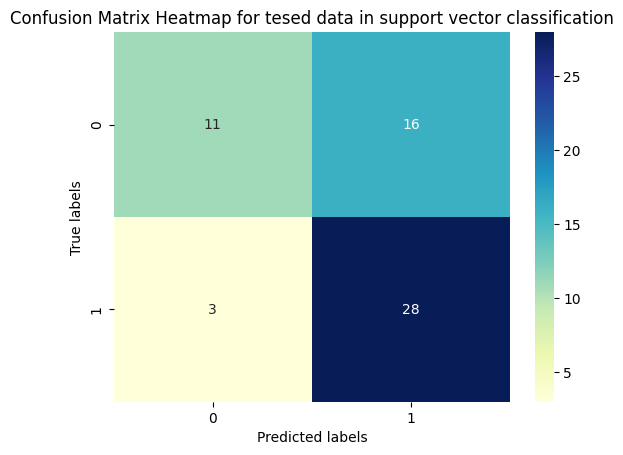

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
# Set labels for the axes
plt.title("Confusion Matrix Heatmap for tesed data in support vector classification")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

*Calculation of evaluation critira from confution matrix*

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 
# Compute evaluation metrics
scores = cross_val_score(SVM_Model, features,label , cv=kfold)
precision_scores_crossval = cross_val_score(SVM_Model, features, label, cv=kfold, scoring='precision')
f1_scores_crossval = cross_val_score(SVM_Model, features, label, cv=kfold,  scoring='f1')

tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
# Compute ROC curve and area under the curve (AUC)
probas = SVM_Model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
trainscore =  SVM_Model.score(X_train,y_train)

##ROC Curve

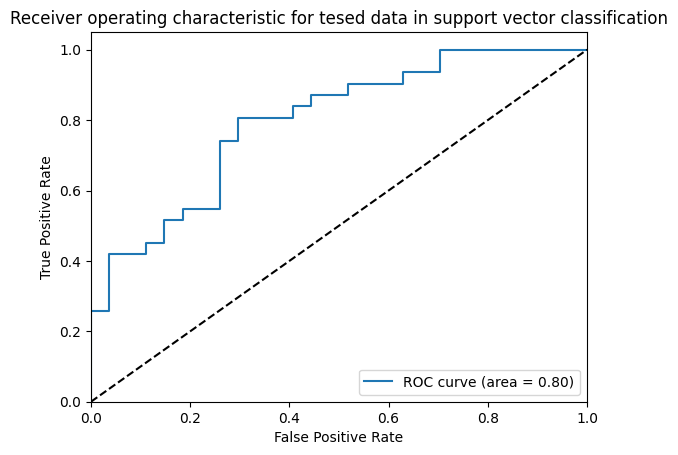

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for tesed data in support vector classification')
plt.legend(loc="lower right")
plt.show()

##Display the evaluation values

In [ ]:
# Print evaluation metrics
Yprobas = SVM_Model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, Yprobas)
print('Support vector classification\n')
print("Confusion Matrix for tesed data:\n", cm)
print("Recall for tesed data:", recall)
print("Specificity for tesed data:", specificity)
print("Precision for tesed data:", precision)
print("Precision for tested data with cross validation:",precision_scores_crossval.mean())
print("NPV for tesed data: ", npv)
print("Accuracy for tesed data:", accuracy)
print("Accuracy with cross validation:" ,scores.mean())
print("F1 Score for tesed data:", f1_score)
print("F1 Score for tested data with cross validation:",f1_scores_crossval.mean())
print("AUC for tesed data:", auc)
print("Accuracy for Trianed data:",trainscore)

Support vector classification

Confusion Matrix for tesed data:
 [[11 16]
 [ 3 28]]
Recall for tesed data: 0.9032258064516129
Specificity for tesed data: 0.4074074074074074
Precision for tesed data: 0.6363636363636364
Precision for tested data with cross validation: 0.6527100795185901
NPV for tesed data:  0.7857142857142857
Accuracy for tesed data: 0.6724137931034483
Accuracy with cross validation: 0.6607985480943738
F1 Score for tesed data: 0.7466666666666666
F1 Score for tested data with cross validation: 0.7467243319268635
AUC for tesed data: 0.7956989247311828
Accuracy for Trianed data: 0.6666666666666666


*Variables to Visualize Evaluations*

In [ ]:
Accuracy_4= accuracy
Specificity_4=specificity
Precision_4=precision
Recall_4=recall
F1_score_4=f1_score
Auc_4=auc

Accuracy_scores_crossval_4=scores.mean()
Precision_scores_crossval_4=precision_scores_crossval.mean()
F1_scores_crossval_4=f1_scores_crossval.mean()

#XGBOOST Model

In [ ]:
XGBoost_Model=models[4][1]
XGBoost_Model.fit(X_train, y_train)
y_pred = XGBoost_Model.predict(X_test)
kfold = KFold(num_splits, shuffle= True, random_state = 42)
print(kfold)

KFold(n_splits=5, random_state=42, shuffle=True)


##Confusion Matrix


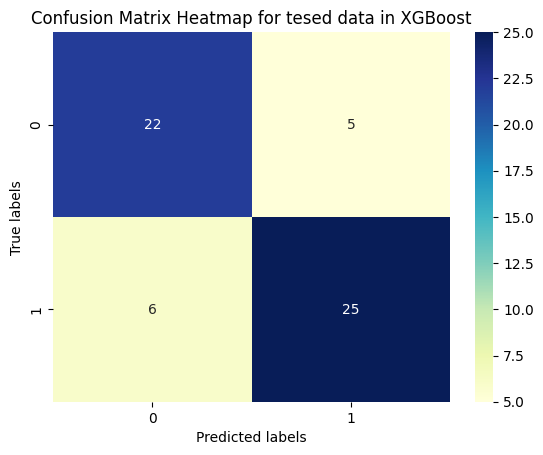

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
# Set labels for the axes
plt.title("Confusion Matrix Heatmap for tesed data in XGBoost")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

*Calculation of evaluation critira from confution matrix*

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 
# Compute evaluation metrics
scores = cross_val_score(XGBoost_Model, features,label , cv=kfold)
precision_scores_crossval = cross_val_score(XGBoost_Model, features, label, cv=kfold, scoring='precision')
f1_scores_crossval = cross_val_score(XGBoost_Model, features, label, cv=kfold,  scoring='f1')

tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
npv = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
# Compute ROC curve and area under the curve (AUC)
probas = XGBoost_Model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
trainscore =  XGBoost_Model.score(X_train,y_train)

##ROC Curve


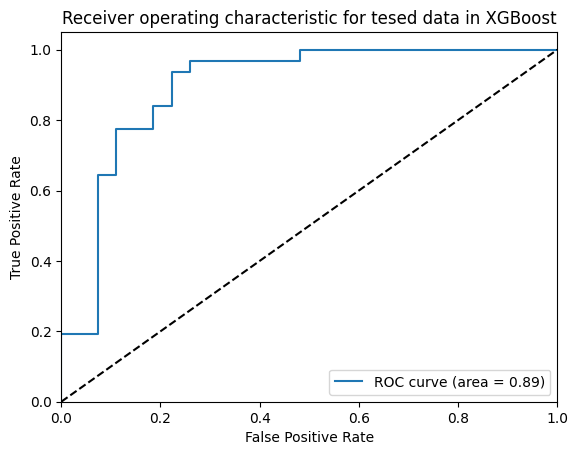

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for tesed data in XGBoost')
plt.legend(loc="lower right")
plt.show()

##Display the evaluation values

In [ ]:
# Print evaluation metrics
Yprobas = XGBoost_Model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, Yprobas)
print('XGBoost\n')
print("Confusion Matrix for tested data:\n", cm)
print("Recall for tested data:", recall)
print("Specificity for tested data:", specificity)
print("Precision for tested data:", precision)
print("Precision for tested data with cross validation:",precision_scores_crossval.mean())
print("NPV for tesed data:", npv)
print("Accuracy for tesed data:", accuracy)
print("Accuracy with cross validation:" ,scores.mean())
print("F1 Score for tested data with cross validation:",f1_scores_crossval.mean())
print("F1 Score for tesed data:", f1_score)
print("AUC for tesed data:", auc)
print("Accuracy for Trianed data:",trainscore)

XGBoost

Confusion Matrix for tested data:
 [[22  5]
 [ 6 25]]
Recall for tested data: 0.8064516129032258
Specificity for tested data: 0.8148148148148148
Precision for tested data: 0.8333333333333334
Precision for tested data with cross validation: 0.8312531328320801
NPV for tesed data: 0.7857142857142857
Accuracy for tesed data: 0.8103448275862069
Accuracy with cross validation: 0.8338173018753782
F1 Score for tested data with cross validation: 0.8613241938228537
F1 Score for tesed data: 0.819672131147541
AUC for tesed data: 0.894862604540024
Accuracy for Trianed data: 0.9047619047619048


*Variables to Visualize Evaluations*

In [ ]:
Accuracy_5= accuracy
Specificity_5=specificity
Precision_5=precision
Recall_5=recall
F1_score_5=f1_score
Auc_5=auc

Accuracy_scores_crossval_5=scores.mean()
Precision_scores_crossval_5=precision_scores_crossval.mean()
F1_scores_crossval_5=f1_scores_crossval.mean()

##Comparison between models without cross-validation

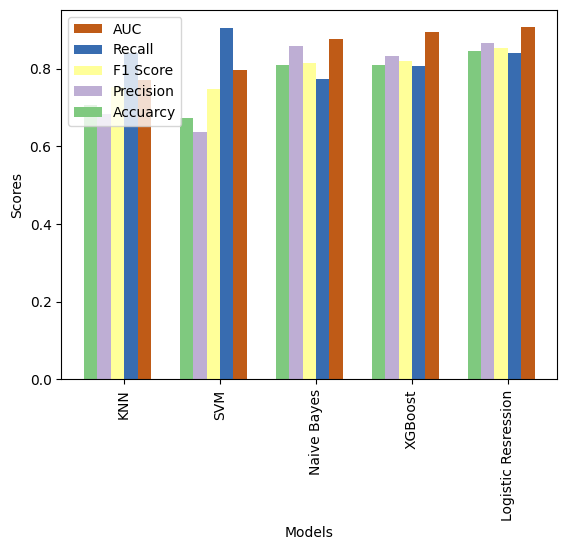

In [ ]:
dpoints = np.array([['Accuarcy', 'Logistic Resression', Accuracy_1],
           ['Accuarcy', 'KNN', Accuracy_2],
           ['Accuarcy', 'Naive Bayes', Accuracy_3],
           ['Accuarcy', 'SVM', Accuracy_4],
           ['Accuarcy', 'XGBoost', Accuracy_5],
           ['Precision', 'Logistic Resression', Precision_1],
           ['Precision', 'KNN', Precision_2],
           ['Precision', 'Naive Bayes', Precision_3],
           ['Precision', 'SVM', Precision_4],
           ['Precision', 'XGBoost', Precision_5],
           ['Recall', 'Logistic Resression', Recall_1],
           ['Recall', 'KNN', Recall_2],
           ['Recall', 'Naive Bayes', Recall_3],
           ['Recall', 'SVM', Recall_4],
           ['Recall', 'XGBoost', Recall_5],
           ['F1 Score', 'Logistic Resression', F1_score_1],
           ['F1 Score', 'KNN', F1_score_2],
           ['F1 Score', 'Naive Bayes', F1_score_3],
           ['F1 Score', 'SVM', F1_score_4],
           ['F1 Score', 'XGBoost', F1_score_5],
           ['AUC', 'Logistic Resression', Auc_1],
           ['AUC', 'KNN', Auc_2],
           ['AUC', 'Naive Bayes', Auc_3],
           ['AUC', 'SVM', Auc_4],
           ['AUC', 'XGBoost', Auc_5]])

fig = plt.figure()
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    

    # Aggregate the Scores and the models according to their
    # mean values
    Scores = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    models = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]

    # sort the Scores, model and data so that the bars in
    # the plot will be ordered by models and Scores
    Scores = [c[0] for c in sorted(Scores, key=o.itemgetter(1))]
    models = [c[0] for c in sorted(models, key=o.itemgetter(1))]

    dpoints = np.array(sorted(dpoints, key=lambda x: models.index(x[1])))

    # the space between each set of bars
    space = 0.3
    n = len(Scores)
    width = (1 - space) / (len(Scores))

    # Create a set of bars at each position
    for i,score in enumerate(Scores):
        indeces = range(1, len(models)+1)
        vals = dpoints[dpoints[:,0] == score][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=score, 
               color=mcm.Accent(float(i) / n))

    # Set the x-axis tick labels to be equal to the models
    ax.set_xticks(indeces)
    ax.set_xticklabels(models)
    plt.setp(plt.xticks()[1], rotation=90)

    # Add the axis labels
    ax.set_ylabel("Scores")
    ax.set_xlabel("Models")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left')

barplot(ax, dpoints)
plt.show()

##Comparison between models with cross-validation

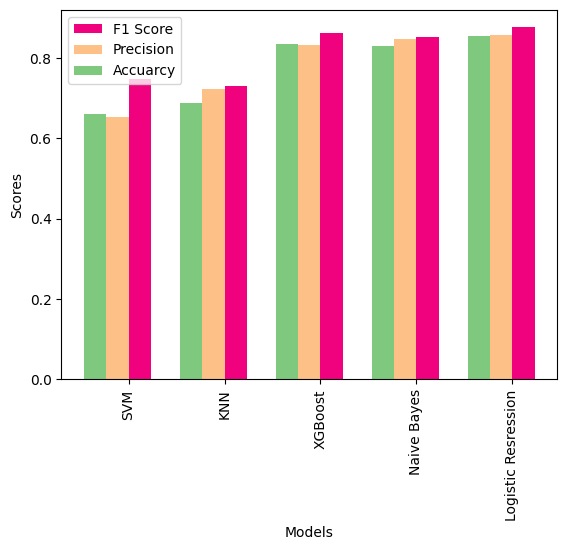

In [ ]:
dpoints = np.array([['Accuarcy', 'Logistic Resression', Accuracy_scores_crossval_1],
           ['Accuarcy', 'KNN', Accuracy_scores_crossval_2],
           ['Accuarcy', 'Naive Bayes', Accuracy_scores_crossval_3],
           ['Accuarcy', 'SVM', Accuracy_scores_crossval_4],
           ['Accuarcy', 'XGBoost', Accuracy_scores_crossval_5],
           ['Precision', 'Logistic Resression', Precision_scores_crossval_1],
           ['Precision', 'KNN', Precision_scores_crossval_2],
           ['Precision', 'Naive Bayes', Precision_scores_crossval_3],
           ['Precision', 'SVM', Precision_scores_crossval_4],
           ['Precision', 'XGBoost', Precision_scores_crossval_5],
           ['F1 Score', 'Logistic Resression', F1_scores_crossval_1],
           ['F1 Score', 'KNN', F1_scores_crossval_2],
           ['F1 Score', 'Naive Bayes', F1_scores_crossval_3],
           ['F1 Score', 'SVM', F1_scores_crossval_4],
           ['F1 Score', 'XGBoost', F1_scores_crossval_5]])

fig = plt.figure()
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    # Aggregate the Scores and the models according to their
    # mean values
    Scores = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    models = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]

    # sort the Scores, models and data so that the bars in
    # the plot will be ordered by model and Scores
    Scores = [c[0] for c in sorted(Scores, key=o.itemgetter(1))]
    models = [c[0] for c in sorted(models, key=o.itemgetter(1))]

    dpoints = np.array(sorted(dpoints, key=lambda x: models.index(x[1])))

    # the space between each set of bars
    space = 0.3
    n = len(Scores)
    width = (1 - space) / (len(Scores))

    # Create a set of bars at each position
    for i,score in enumerate(Scores):
        indeces = range(1, len(models)+1)
        vals = dpoints[dpoints[:,0] == score][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        ax.bar(pos, vals, width=width, label=score, 
               color=mcm.Accent(float(i) / n))

    # Set the x-axis tick labels to be equal to the models
    ax.set_xticks(indeces)
    ax.set_xticklabels(models)
    plt.setp(plt.xticks()[1], rotation=90)

    # Add the axis labels
    ax.set_ylabel("Scores")
    ax.set_xlabel("Models")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left')

barplot(ax, dpoints)
plt.show()